# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [5]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


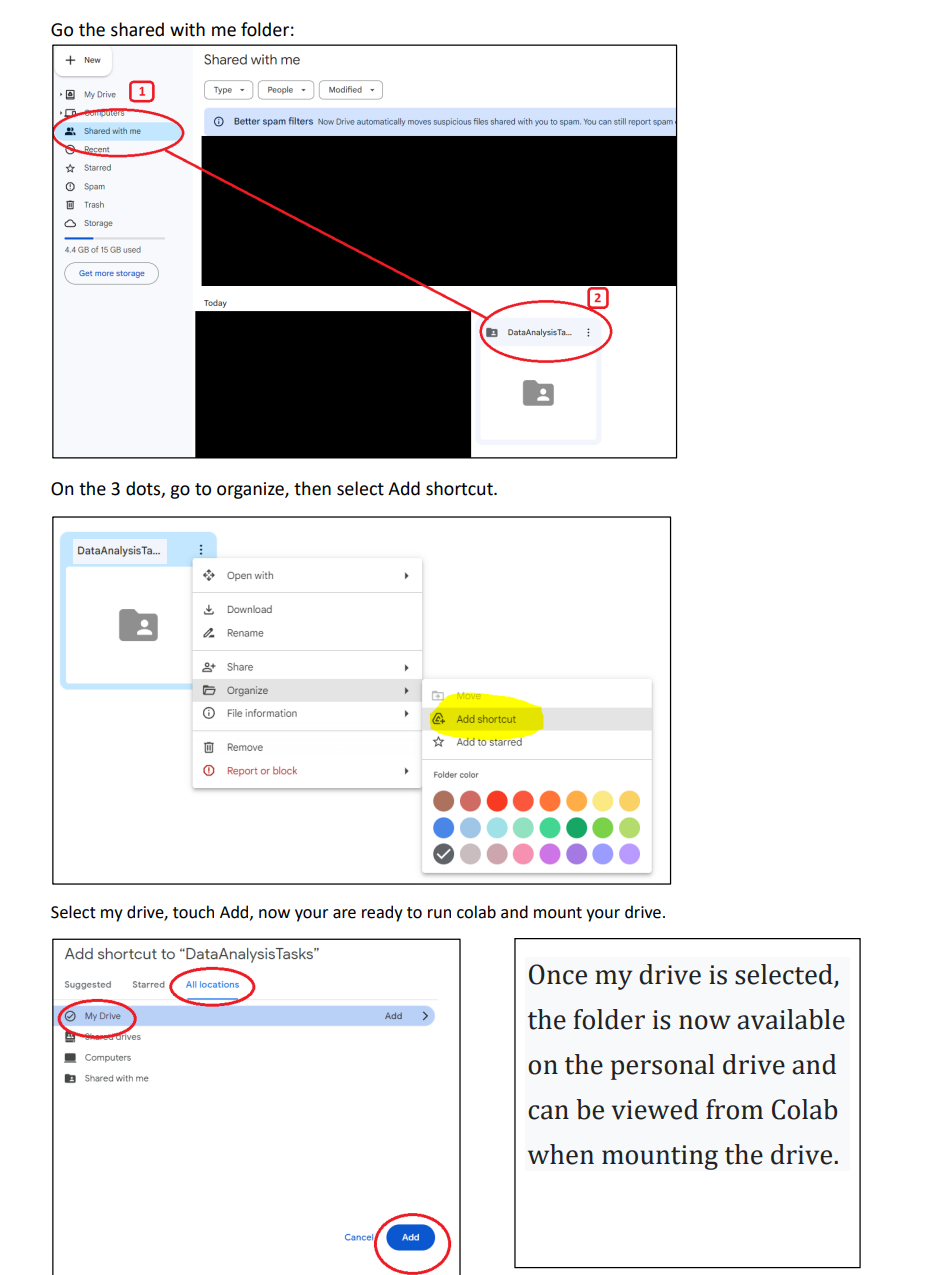

In [6]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [11]:
# Import necessary libraries
import pandas as pd
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, output_notebook, show
from bokeh.palettes import Spectral11
from bokeh.layouts import column

try:
    # 1. Read the workout data from the CSV file
    data = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/fifa_results.csv")
    data.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")
# Ensure Bokeh plots are displayed within the notebook
output_notebook()

CSV file loaded successfully, you can start working right now


In [14]:
df = data.copy()
df['date'] = pd.to_datetime(df['date'])
# Calculate average home and away scores for each tournament over time
df_grouped_home = df.groupby(['date', 'tournament']).home_score.mean().reset_index()
df_grouped_away = df.groupby(['date', 'tournament']).away_score.mean().reset_index()

# Create a Bokeh interactive plot
p = figure(title="Average Scores Across Tournaments Over Time", x_axis_label='Date', y_axis_label='Average Score', x_axis_type="datetime", height=600, width=800, tools="pan,box_zoom,reset")
p.title.text_font_size = '16pt'

tournaments = df['tournament'].unique()
colors = [Spectral11[i % 11] for i in range(len(tournaments))]

for i, tournament in enumerate(tournaments):
    subset_home = df_grouped_home[df_grouped_home['tournament'] == tournament]
    subset_away = df_grouped_away[df_grouped_away['tournament'] == tournament]

    source = ColumnDataSource(data={
        'date': subset_home['date'],
        'home_score': subset_home['home_score'],
        'away_score': subset_away['away_score']
    })

    p.line(x='date', y='home_score', source=source, legend_label=f"{tournament} (Home)", line_width=2, color=colors[i])
    p.line(x='date', y='away_score', source=source, legend_label=f"{tournament} (Away)", line_width=2, color=colors[i], line_dash="dotted")

p.legend.location = "top_left"
p.legend.click_policy="hide"
p.add_tools(HoverTool(show_arrow=False, line_policy='next', tooltips=[('Date', '@date{%F}'), ('Home Score', '@home_score'), ('Away Score', '@away_score')], formatters={'@date': 'datetime'}))

show(p)
